## <font color='purple'> DATA 240: Bonus Assignment- Dimension Reduction using PCA

<b>Name:</b> Eshita Gupta \
<b>Course:</b> Data 240 \
<b>SJSU ID:</b> 016978741 

<font color='blue'>  Importing the required dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<font color='purple'> Please download fashion_mnist1.csv

In [2]:
data = pd.read_csv('fashion_mnist1.csv')

In [3]:
data.head(2)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<font color='blue'> Shape of FashionMNIST

In [4]:
data.shape

(10000, 785)

In [5]:
data.dtypes

label       int64
pixel1      int64
pixel2      int64
pixel3      int64
pixel4      int64
            ...  
pixel780    int64
pixel781    int64
pixel782    int64
pixel783    int64
pixel784    int64
Length: 785, dtype: object

In [6]:
object_columns = data.dtypes[data.dtypes == 'object'].index.tolist()
print(object_columns)

[]


<font color='blue'> We have all numerical columns in the subject dataframe

<b> <font color='purple'> Dimension reduction using principal component analysis (PCA)
   
<b><font color='purple'>  If the data is highly dimensional, you can use PCA to find a reduced-rank approximation of the data that can be visualized easily. 

<font color='blue'> Converting the data into Numpy Array and separate labels and pixel values

In [7]:
data = data.to_numpy()

labels = data[:, 0]
pixels = data[:, 1:]

<font color='blue'> Reshaping and Normalizing the Pixel Values such that pixel values to be in the range [0,1] and reshaping pixel values from a flat array into a 28x28 array for each image

In [8]:
pixels = pixels / 255.0 # Normalize the pixel values to [0, 1]

images = pixels.reshape(-1, 28, 28)

print(f"Shape of images: {images.shape}")  
print(f"Shape of labels: {labels.shape}")  

Shape of images: (10000, 28, 28)
Shape of labels: (10000,)


<font color='blue'>Viewing sample images for each label

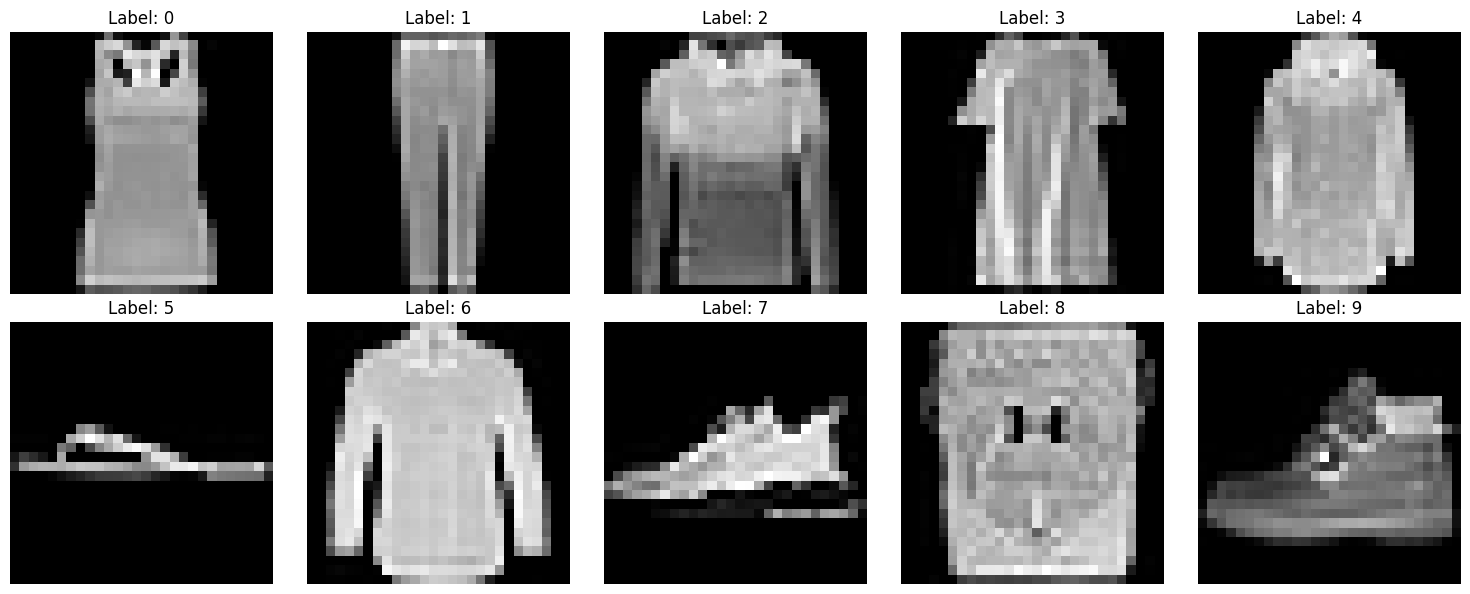

In [9]:
def plot_images(images, labels, num_rows=2, num_cols=5):
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 6))
    unique_labels = np.unique(labels)
    for i, label in enumerate(unique_labels):
        row = i // num_cols
        col = i % num_cols
        ax = axes[row, col]
        index = np.where(labels == label)[0][0]
        ax.imshow(images[index].reshape(28, 28), cmap='gray')
        ax.set_title(f"Label: {label}")
        ax.axis('off')
    plt.tight_layout()
    plt.show()

plot_images(pixels, labels, num_rows=2, num_cols=5)

<font color='purple'>  1.1 Using Singular-Value Decomposition (SVD) method, please decompose 1st and 2nd principal components and project them to the data.\
<font color='purple'> Please draw 2D plot using the 1st and 2nd principal components.\
<font color='purple'> Please legend different colors for the 10 labels in the graph.

<font color='blue'> Decompose the data using SVD (Singular Value decomposition)

<font color='blue'> First, flattening the images to a 2D array, each row representing an image.

In [10]:
num_samples = images.shape[0]
flattened_images = images.reshape(num_samples, -1)

print(f"Shape of flattened images: {flattened_images.shape}")

Shape of flattened images: (10000, 784)


<font color='blue'> Computing the SVD and obtaining the first two principal components.

In [11]:
U, S, Vt = np.linalg.svd(flattened_images, full_matrices=False)

print(U.shape)
print(S.shape)
print(Vt.shape)

(10000, 784)
(784,)
(784, 784)


<font color='blue'> Select the first and second principal components

In [12]:
PC1 = Vt[0]
PC2 = Vt[1]

<font color='blue'> Projecting the data onto the first two principal components

In [13]:
data_proj = np.dot(flattened_images, np.array([PC1, PC2]).T)

print(f"Shape of projected data: {data_proj.shape}") 

Shape of projected data: (10000, 2)


<font color='blue'> Displaying projected data array

In [14]:
display(data_proj)

array([[ -1.84424796,  -0.93231948],
       [ -5.58523088,  -3.67427098],
       [-16.29737118,   0.19563676],
       ...,
       [ -4.24298242,  -4.12134702],
       [-15.41522431,   5.24241441],
       [ -5.07348074,  -3.53988352]])

<font color='blue'> Plotting the data with 10 different labels using the 1st and 2nd principal components

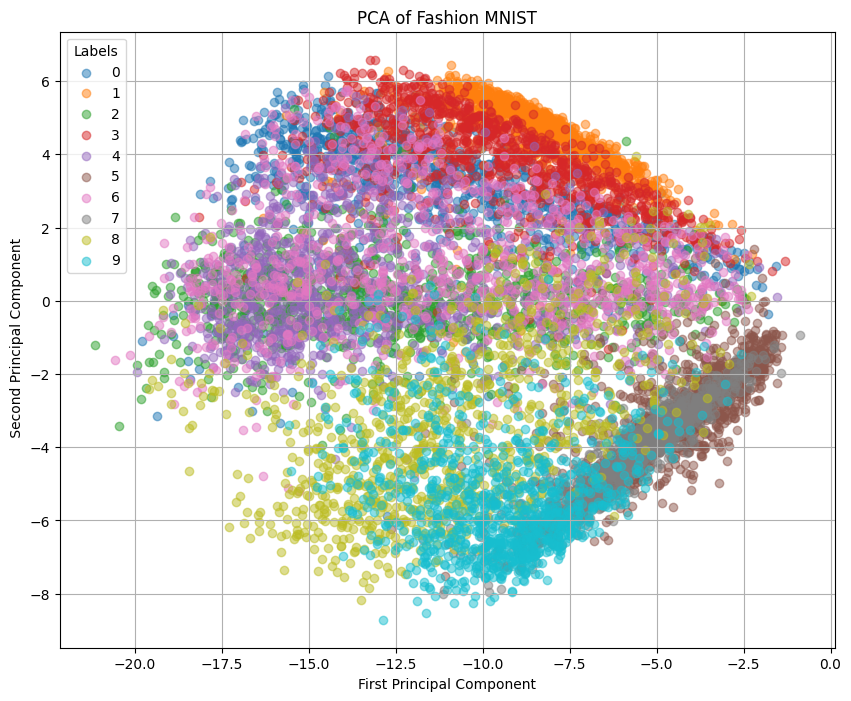

In [15]:
plt.figure(figsize=(10, 8))

for i in range(10):
    indices = (labels == i)
    plt.scatter(data_proj[indices, 0], data_proj[indices, 1], label=str(i), alpha=0.5)

plt.xlabel('First Principal Component')
plt.ylabel(' Second Principal Component')
plt.title('PCA of Fashion MNIST')
plt.grid(True)
plt.legend(title='Labels')
plt.show()

<font color='blue'> Printing the variance explained in the first two Prinicipal component

In [16]:
explained_variance = (S ** 2) / np.sum(S ** 2)

print(f"Variance explained by the 1st principal component: {explained_variance[0]}")
print(f"Variance explained by the 2nd principal component: {explained_variance[1]}")

Variance explained by the 1st principal component: 0.6814324279087677
Variance explained by the 2nd principal component: 0.08273695067184902


<b><font color='purple'> 1.2 As we discussed during the class, we can compress images using PCA.

<b><font color='purple'>Please select 10 images. The selected images should have different labels. Please compress the images using k=2, 5, 10. Then, visualize the original images and the compressed images with different k.

<font color='blue'> Selecting 10 unique labels and corresponding images

In [17]:
unique_labels = np.unique(labels)
selected_labels = unique_labels[:10]
selected_images = []
print(selected_labels)

[0 1 2 3 4 5 6 7 8 9]


In [18]:
for label in selected_labels:
    indices = np.where(labels == label)[0]
    selected_images.append(pixels[indices[0]])  

selected_images = np.array(selected_images)
print(selected_images)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.00392157 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


<font color='blue'> Compressing and reconstructing images using SVD with select k prinicipal components

In [19]:
def compress_and_reconstruct(image, k):
    U, S, Vt = np.linalg.svd(image, full_matrices=False)
    Ak = np.dot(U[:, :k], np.diag(S[:k]))
    reconstructed_image = np.dot(Ak, Vt[:k, :])
    return reconstructed_image

<font color='blue'> Visualizing original and compressed images for different select k values

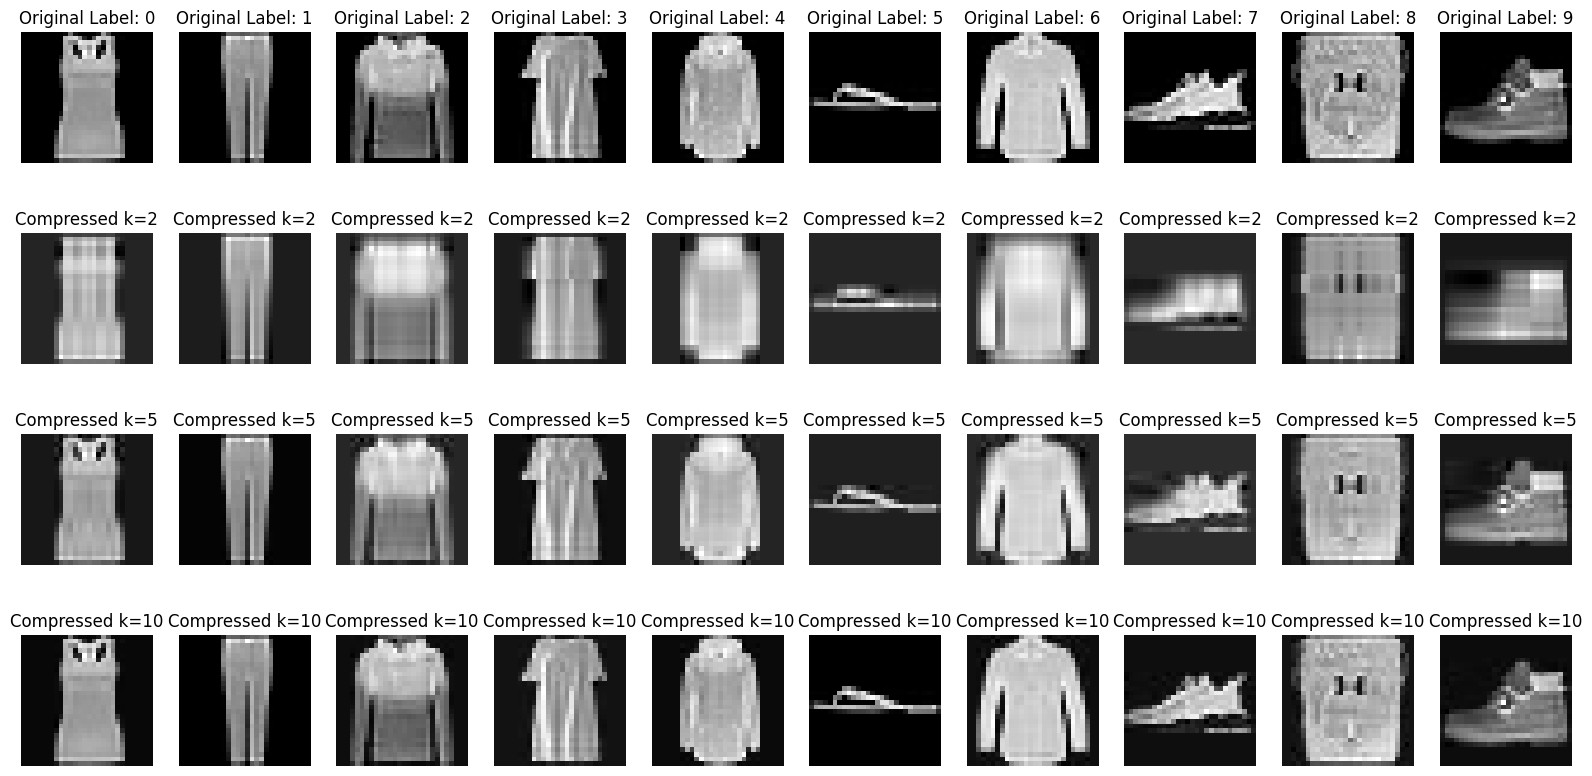

In [20]:
k_values = [2, 5, 10]
num_images = selected_images.shape[0]

fig, axes = plt.subplots(len(k_values) + 1, num_images, figsize=(20, 10))

# plot for original images
for i in range(num_images):
    axes[0, i].imshow(selected_images[i].reshape(28, 28), cmap='gray')
    axes[0, i].set_title(f'Original Label: {selected_labels[i]}')
    axes[0, i].axis('off')

# plot for compressed images
for j, k in enumerate(k_values):
    for i in range(num_images):
        compressed_image = compress_and_reconstruct(selected_images[i].reshape(28, 28), k)
        axes[j + 1, i].imshow(compressed_image, cmap='gray')
        axes[j + 1, i].set_title(f'Compressed k={k}')
        axes[j + 1, i].axis('off')
plt.show()

<font color='blue'>PCAs primary objective is to transform the data into a lower-dimensional space while preserving as much variance as possible.

<font color='blue'>The first two Principal Component captures most of the variance of original data.The First PC captures the most significant features or characteristics of the data, while second PC captures the next highest variance, which is orthogonal to the first.

<font color='blue'>In essence, for K=1 we are focussing on the most significant direction of variance, therefore reconstructing images which look similar but still miss the details. As we increase k, recosntruction of images starts to get better, as each additional component caputuring some additional features.

 <font color='blue'>k =2 : adding a second dimension, helps capture additional features.\
 <font color='blue'>k =5 : This is allowing for more complex structures and variations in the images, capturing patterns and textures.\
<font color='blue'> k =10 : Preserving a significant portion of the dataset’s variance, hence reconsstructed images at k=10 resemebles closely to the original.


## <b> <font color='blue'>Thank You

#### T-SNE in another NB